# Sprint 機械学習スクラッチ クラスタリング

参考サイト：<br>
https://qiita.com/navitime_tech/items/bb1bd01537bc2713444a<br>

In [3]:
import numpy as np
class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録a
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pass
        return

【問題1】中心点の初期値を決める

In [4]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [83]:
K = 3
X.shape
# 初期値のインデックスを抽出
prior_point = np.random.choice(range(len(X)), K)
centroids = X[prior_point]
print(prior_point)
print(prior_data)

[ 4  1 89]
[[ 0.92466065  4.50908658]
 [-0.96358605  2.37791651]
 [ 1.85367905  1.5088862 ]]


【問題2】SSEを求める関数の作成

In [137]:
def _SSE(X, centroids, clusters):
    sse_value = 0
    for i in range(len(X)):
        for c in range(K):
            if c == clusters[i]:
                sse_value = sse_value + (np.linalg.norm(X[i] - centroids[clusters[i]]))**2
            else:
                sse_value += 0
    return sse_value

【問題3】クラスタへの割り当て

In [84]:
# np.linalg.norm: 入力配列から0引いた値の二乗平方和を計算している→ユークリッドやりたいなら自分で引く必要有り
np.linalg.norm(X - prior_data[0,:])

31.141829164148703

In [85]:
clusters = np.random.randint(0, K, X.shape[0])
clusters

array([1, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2,
       2, 1, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1,
       1, 1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2])

In [86]:
new_clusters = np.array([np.linalg.norm(X - c, axis=1) for c in centroids]).argmin(axis=0)

In [87]:
new_clusters

array([2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2])

【問題4】中心点の移動

In [88]:
centroids = np.array([X[new_clusters == n, :].mean(axis=0) for n in range(K)])

In [89]:
centroids

array([[ 1.52641915,  4.79389406],
       [-1.26811733,  7.76378266],
       [ 0.42044706,  2.69032202]])

【問題5】繰り返し

In [108]:
max_iter = 10
K = 3
X.shape
# 初期値のインデックスを抽出
prior_point = np.random.choice(range(len(X)), K)
centroids = X[prior_point]
clusters = np.random.randint(0, K, X.shape[0])

for _ in range(max_iter):
    new_centroids = np.array([X[clusters == n, :].mean(axis=0) for n in range(K)])
    new_clusters = np.array([np.linalg.norm(X - c, axis=1) for c in new_centroids]).argmin(axis=0)

    clusters = new_clusters

In [109]:
new_clusters

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0,
       1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1,
       1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0,
       1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [119]:
new_centroids[1]

array([-0.27678616,  3.72096344])

【問題6】異なる初期値で計算

In [141]:
max_iter = 10
K = 3
n_init = 10
all_centroid = []
all_sse = []
# 初期値のインデックスを抽出
for _ in range(n_init):
    prior_point = np.random.choice(range(len(X)), K)
    centroids = X[prior_point]
    clusters = np.random.randint(0, K, X.shape[0])

    for _ in range(max_iter):
        new_centroids = np.array([X[clusters == n, :].mean(axis=0) for n in range(K)])
        new_clusters = np.array([np.linalg.norm(X - c, axis=1) for c in new_centroids]).argmin(axis=0)

        clusters = new_clusters
    
    all_sse.append(_SSE(X, new_centroids, new_clusters))
    all_centroid.append(new_centroids)
    
best_sse_index = np.argmin(all_sse)
best_centroid = all_centroid[best_sse_index]
print('最小SSE: {}'.format(all_sse[best_sse_index]))
print('その時のcentroid \n{}'.format(best_centroid))

最小SSE: 139.1709777203381
その時のcentroid 
[[-0.27678616  3.72096344]
 [ 1.99186903  0.96561071]
 [-1.26811733  7.76378266]]


【問題7】推定

In [157]:
import numpy as np
class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters=3, n_init=10, max_iter=10, tol=40, verbose=False):
        # ハイパーパラメータを属性として記録a
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
    def fit_predict(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        all_centroid = []
        all_sse = []
        all_clusters = []
        # 初期値のインデックスを抽出
        for i in range(self.n_init):
            prior_point = np.random.choice(range(len(X)), self.n_clusters)
            centroids = X[prior_point]
            clusters = np.random.randint(0, self.n_clusters, X.shape[0])

            for _ in range(self.max_iter):
                self.new_centroids = np.array([X[clusters == n, :].mean(axis=0) for n in range(self.n_clusters)])
                self.new_clusters = np.array([np.linalg.norm(X - c, axis=1) for c in self.new_centroids]).argmin(axis=0)
                print(self.new_centroids, self.new_clusters)
#                 if self._SSE(X, new_centroids, new_clusters) <= self.tol:
#                     break
                clusters = self.new_clusters
#             sse = self._SSE(X, self.new_centroids, self.new_clusters)
#             if sse <= self.tol:
#                 break
            
            all_centroid.append(self.new_centroids)
            all_clusters.append(self.new_clusters)
            sse = self._SSE(X, self.new_centroids, self.new_clusters)
            all_sse.append(sse)
#             if sse >= self.tol:
#                 all_sse.append(sse)
#             elif sse < self.tol:
#                 break
                
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | information gain value: {2}'.format(i+1, self.n_init, all_sse[-1]))
    
        best_sse_index = np.argmin(all_sse)
        self.best_sse = all_sse[best_sse_index]
        self.best_centroid = all_centroid[best_sse_index]
        self.best_clusters = all_clusters[best_sse_index]
        print('最小SSE: {}'.format(all_sse[best_sse_index]))
        print('その時のcentroid \n{}'.format(self.best_centroid))
#         print('その時のcluster \n{}'.fotmat(self.best_clusters))
        
        return self.best_clusters
        

#     def predict(self, X):
#         """
#         入力されたデータがどのクラスタに属するかを計算
#         """
#         pass
#         return
    
    def _SSE(self, X, centroids, clusters):
        sse_value = 0
        for i in range(len(X)):
            for c in range(self.n_clusters):
                if c == clusters[i]:
                    sse_value = sse_value + (np.linalg.norm(X[i] - centroids[clusters[i]]))**2
                else:
                    sse_value += 0
        return sse_value

In [158]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [159]:
myk_means = ScratchKMeans(n_clusters=8, verbose=True)
pred = myk_means.fit_predict(X)
pred

[[ 0.12611598  3.62576453]
 [-0.18680123  3.06387506]
 [ 0.1364865   3.82060102]
 [ 0.10420692  4.10016388]
 [-0.02130748  3.89644272]
 [ 0.00901224  3.86826372]
 [ 0.80980748  4.42035165]
 [-0.3213842   5.5437567 ]] [2 7 6 6 6 6 4 7 7 7 7 7 7 7 7 1 1 1 1 1 6 7 1 1 6 1 4 6 0 1 1 7 1 1 1 6 7
 1 7 1 6 1 7 1 1 7 1 1 6 0 6 1 1 4 1 7 7 1 1 7 7 1 1 6 1 7 1 1 1 6 7 1 6 7
 6 6 1 1 1 1 1 7 1 3 1 1 1 1 6 6 6 1 0 1 1 7 7 4 7 3]
[[ 1.26125481  2.9175919 ]
 [ 0.35204151  1.89057248]
 [ 0.72086751  3.71347124]
 [-0.06545184  4.41400691]
 [-1.45711387  3.78703054]
 [        nan         nan]
 [ 1.12879695  4.38900634]
 [-1.21460762  7.66822082]] [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
[[       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [0.04254484 4.04283006]
 [      

<ipython-input-157-206bd52a88f7>:44: RuntimeWarning: Mean of empty slice.
  self.new_centroids = np.array([X[clusters == n, :].mean(axis=0) for n in range(self.n_clusters)])


[[-1.72524379  3.46019327]
 [-1.50112263  2.67708471]
 [ 1.54650761  3.99037636]
 [-1.26811733  7.76378266]
 [ 0.94874525  4.65238674]
 [ 0.64185779  3.77160496]
 [ 1.99186903  0.96561071]
 [-0.32495857  3.84943601]] [5 3 2 4 4 5 0 3 4 3 3 3 3 3 3 6 6 7 1 6 2 3 0 6 4 1 7 4 6 6 6 3 6 6 0 2 3
 6 3 1 4 0 3 0 1 3 6 0 5 5 4 6 1 0 1 3 3 6 6 3 3 6 6 4 6 3 1 1 6 4 3 6 4 3
 4 2 7 0 6 6 6 3 0 7 6 1 6 6 2 4 4 1 5 1 0 3 3 0 3 7]
[[-1.72524379  3.46019327]
 [-1.50112263  2.67708471]
 [ 1.54650761  3.99037636]
 [-1.26811733  7.76378266]
 [ 0.94874525  4.65238674]
 [ 0.64185779  3.77160496]
 [ 1.99186903  0.96561071]
 [-0.32495857  3.84943601]] [5 3 2 4 4 5 0 3 4 3 3 3 3 3 3 6 6 7 1 6 2 3 0 6 4 1 7 4 6 6 6 3 6 6 0 2 3
 6 3 1 4 0 3 0 1 3 6 0 5 5 4 6 1 0 1 3 3 6 6 3 3 6 6 4 6 3 1 1 6 4 3 6 4 3
 4 2 7 0 6 6 6 3 0 7 6 1 6 6 2 4 4 1 5 1 0 3 3 0 3 7]
[[-1.72524379  3.46019327]
 [-1.50112263  2.67708471]
 [ 1.54650761  3.99037636]
 [-1.26811733  7.76378266]
 [ 0.94874525  4.65238674]
 [ 0.64185779  3.771604

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

【問題8】エルボー法の実装

In [56]:
num_cluster = 6
all_sse = []
for i in range(1, num_cluster):
    myk_means = ScratchKMeans(n_clusters=i, verbose=True)
    myk_means.fit_predict(X)
    all_sse.append(myk_means.best_sse)

1 / 10 times done | information gain value: 870.2611797855423
2 / 10 times done | information gain value: 870.2611797855423
3 / 10 times done | information gain value: 870.2611797855423
4 / 10 times done | information gain value: 870.2611797855423
5 / 10 times done | information gain value: 870.2611797855423
6 / 10 times done | information gain value: 870.2611797855423
7 / 10 times done | information gain value: 870.2611797855423
8 / 10 times done | information gain value: 870.2611797855423
9 / 10 times done | information gain value: 870.2611797855423
10 / 10 times done | information gain value: 870.2611797855423
最小SSE: 870.2611797855423
その時のcentroid 
[[0.04254484 4.04283006]]
1 / 10 times done | information gain value: 351.4837286512545
2 / 10 times done | information gain value: 351.4837286512545
3 / 10 times done | information gain value: 351.4837286512545
4 / 10 times done | information gain value: 351.4837286512545
5 / 10 times done | information gain value: 351.4837286512545
6 / 

<ipython-input-43-d16976d5fe0a>:44: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[clusters == n, :].mean(axis=0) for n in range(self.n_clusters)])


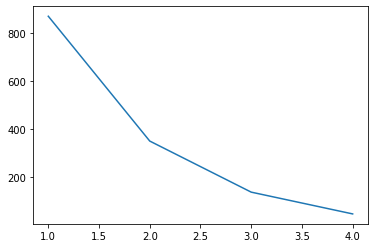

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, num_cluster), all_sse)
plt.show()

【問題9】（アドバンス課題）シルエット図

range(0, 25) (25, 2)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

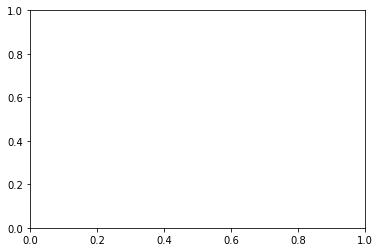

In [62]:
from matplotlib import cm
y_ax_lower, y_ax_upper = 0, 0
yticks = []
n_clusters = 3
cluster_labels = np.unique(pred)
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[pred == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    print(range(y_ax_lower, y_ax_upper), c_silhouette_vals.shape)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
plt.axvline(X.mean(axis=0), color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

【問題10】クラスタ数kの選択

In [107]:
import pandas as pd
data = pd.read_csv('Wholesale_customers_data.csv')
train = data.drop(['Channel', 'Region'], axis=1)
train_array = np.array(train)
train_array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(train)
data_pca = pca.transform(train)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]
[0.45961362 0.40517227 0.07003008 0.04402344 0.01502212 0.00613848]


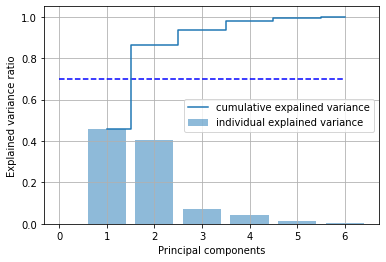

In [111]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
print(var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [116]:
data_pca.shape

(440, 6)

In [88]:
num_cluster = 9
all_sse = []
for i in range(1, num_cluster):
    myk_means = ScratchKMeans(n_clusters=i, verbose=True)
    myk_means.fit_predict(train_array)
    all_sse.append(myk_means.best_sse)

1 / 10 times done | information gain value: 157595857165.60883
2 / 10 times done | information gain value: 157595857165.60883
3 / 10 times done | information gain value: 157595857165.60883
4 / 10 times done | information gain value: 157595857165.60883
5 / 10 times done | information gain value: 157595857165.60883
6 / 10 times done | information gain value: 157595857165.60883
7 / 10 times done | information gain value: 157595857165.60883
8 / 10 times done | information gain value: 157595857165.60883
9 / 10 times done | information gain value: 157595857165.60883
10 / 10 times done | information gain value: 157595857165.60883
最小SSE: 157595857165.60883
その時のcentroid 
[[12000.29772727  5796.26590909  7951.27727273  3071.93181818
   2881.49318182  1524.87045455]]
1 / 10 times done | information gain value: 113222171669.17542
2 / 10 times done | information gain value: 113247492492.76607
3 / 10 times done | information gain value: 114636272017.93054
4 / 10 times done | information gain value: 

<ipython-input-43-d16976d5fe0a>:44: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[clusters == n, :].mean(axis=0) for n in range(self.n_clusters)])


6 / 10 times done | information gain value: 48152813757.62037
7 / 10 times done | information gain value: 42359734807.45274
8 / 10 times done | information gain value: 45856262802.11122
9 / 10 times done | information gain value: nan
10 / 10 times done | information gain value: 46266180463.71253
最小SSE: nan
その時のcentroid 
[[12000.29772727  5796.26590909  7951.27727273  3071.93181818
   2881.49318182  1524.87045455]
 [           nan            nan            nan            nan
             nan            nan]
 [           nan            nan            nan            nan
             nan            nan]
 [           nan            nan            nan            nan
             nan            nan]
 [           nan            nan            nan            nan
             nan            nan]
 [           nan            nan            nan            nan
             nan            nan]
 [           nan            nan            nan            nan
             nan            nan]]
1 / 10 times

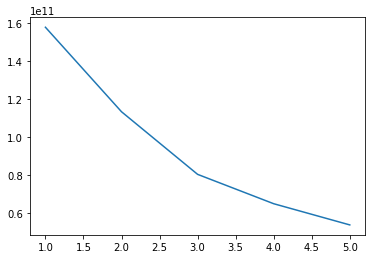

In [89]:
plt.plot(range(1, num_cluster), all_sse)
plt.show()

【問題11】既知のグループとの比較

In [94]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [120]:
myk_means = ScratchKMeans(n_clusters=3, verbose=True)
pred = myk_means.fit_predict(data_pca)
pred

1 / 10 times done | information gain value: 65635272820.12708
2 / 10 times done | information gain value: 59139056716.81718
3 / 10 times done | information gain value: 59220951253.560585
4 / 10 times done | information gain value: 59102149334.96467
5 / 10 times done | information gain value: 59090117388.90006
6 / 10 times done | information gain value: 59286240935.46888
7 / 10 times done | information gain value: 60581263604.86093
8 / 10 times done | information gain value: 59105924822.05928
9 / 10 times done | information gain value: 59105924822.05928
10 / 10 times done | information gain value: 59977274152.5137
最小SSE: 59090117388.90006
その時のcentroid 
[[23737.23822186 -4555.02123441]
 [-1341.31124554 25261.39189714]
 [-4205.98981101 -3080.71552273]]


array([2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

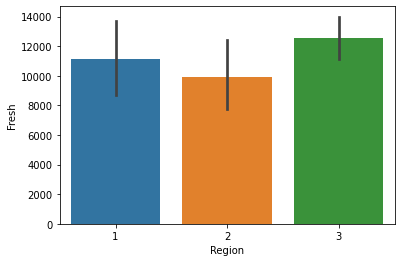

In [103]:
import seaborn as sns
sns.barplot(x = 'Region', y = 'Fresh', data=data)
plt.show()

<AxesSubplot:ylabel='Fresh'>

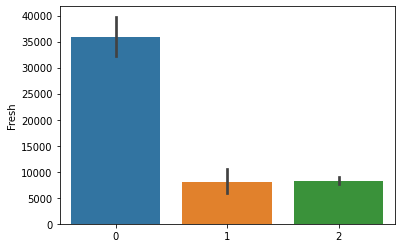

In [121]:
sns.barplot(x = pred, y = 'Fresh', data=data)

【問題12】卸売業者にとって有益な情報

Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。

In [106]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [141]:
data.groupby('Region').mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
2,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
3,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


In [142]:
data.groupby('Region').sum()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,95,854833,422454,570037,231026,204136,104327
2,66,464721,239144,433274,190132,173311,54506
3,421,3960577,1888759,2495251,930492,890410,512110


In [143]:
data.groupby('Region').count()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,77,77,77,77,77,77,77
2,47,47,47,47,47,47,47
3,316,316,316,316,316,316,316


groupby後のデータから言える事：<br>
・地域2の顧客数が圧倒的に少なく、地域3の顧客数が圧倒的に多い。<br>
・にもかかわらず、食糧品の平均使用金額において、地域2が地域1, 3と比べて引けを取らないorそれ以上の金額を叩き出している。<br>
・このことから、1店舗毎の購入金額が多いことが推察できる＝繁盛店・人気店が集中している？<br>
・地域3においては顧客全体の買い上げ金額という観点で群を抜いている為、このエリアで顧客開拓ができれば十分な利益を上げることができると推察<br>

【問題13】（アドバンス課題）他の手法の調査

・DBSCANのメリット・デメリット<br>
参考サイト：https://data-analysis-stats.jp/python/dbscanクラスターの解説と実験/<br>
DBSCANとは：<br>
半径以内に点がいくつあるかでその領域をクラスタとして判断します。<br>
近傍の密度がある閾値を超えている限り，クラスタを成長させ続けます。<br>
半径以内に近く点がない点はノイズになります。<br>
メリット：<br>
１）k-meansと違って，最初にクラスタ数を決めなくてもクラスターを作成できる。<br>
２）とがったクラスターでも分類できます。クラスターが球状であることを前提としない。<br>
３）近傍の密度でクラスターを判断する。<br>

デメリット：<br>
１）border点の概念が微妙で，データによりどのクラスタに属するか変わる可能性がある。<br>
２）データがわからないとパラメータを決めるのが難しい。<br>

・t-SNE、LLEのメリット・デメリット<br>
参考サイト：https://deepage.net/machine_learning/2017/03/08/tsne.html<br>
t-SNEとは：<br>
高次元のデータを調査するための手法として、2008年にvan der MaatenとHintonによって発表 [1] された人気の手法です。<br> 
この技術は、数百または数千次元のデータですら無理やり2次元の「マップ」に落とし込むという、<br>
ほとんど魔法のような能力を備えているために、機械学習の分野で幅広く普及しています。<br>
メリット：<br>
１）高次元の空間特徴を、信頼のおける低次元空間に次元削減することができる<br>

デメリット：<br>
１）perplexityというハイパーパラメータの調整が非常に重要<br>
２）実行結果が安定しない<br>
３）計算時間が長い<br>

【問題14】（アドバンス課題）t-SNEとDBSCANの利用

t-SNEの実行

In [144]:
# データの読み込み
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data    # インスタンス変数 data に画像が準備されている。
X.shape

# あとで結果を確認するために、各画像のラベルを保存する。
labels = digits.target    # インスタンス変数 target に画像に映っている数字が準備されている。
labels.shape

(1797,)

In [145]:
# t-SNEのハイパーパラメータの選択
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, 
            perplexity = 50.0,
            early_exaggeration = 12.0, 
            learning_rate = 400.0, 
            method = "barnes_hut", 
            random_state = 20190704)

In [146]:
# t-SNEの学習と低次元空間の計算
Y = tsne.fit_transform(X)
Y.shape

(1797, 2)

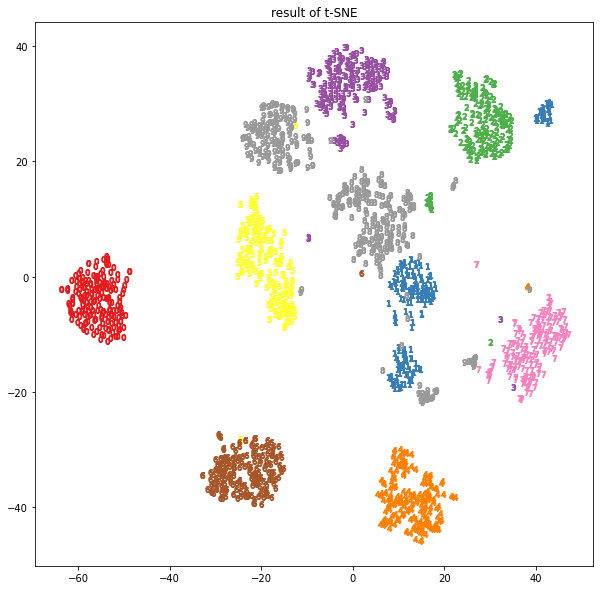

In [147]:
# 計算結果の可視化
import matplotlib.pyplot as plt
cmp = plt.get_cmap("Set1")
plt.figure(figsize = (10, 10))
for i in range(10):
    flag = labels == i
    Y_selected = Y[flag, :]
    plt.scatter(Y_selected[:,0], Y_selected[:,1], color = cmp(i), marker = f"${i}$")
plt.title("result of t-SNE")
plt.show()

DBSCANの実行

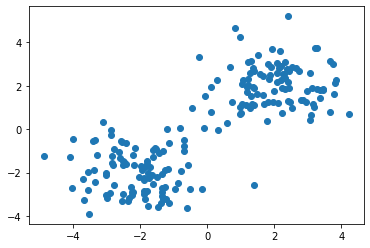

In [148]:
import numpy as np
# デモデータの生成
cluster_0 = np.random.multivariate_normal([-2, -2], [[1, 0], [0, 1]], 100)
cluster_1 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 100)
X = np.r_[cluster_0, cluster_1]
 
# 散布図
plt.scatter(X[:,0], X[:,1])
plt.show()

In [149]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.5, min_samples = 4)
cluster_dbscan = dbscan.fit_predict(X)
cluster_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1, -1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

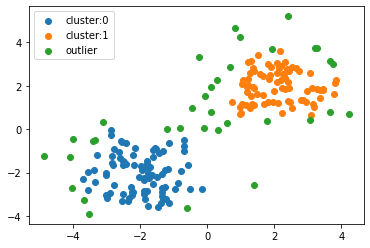

In [150]:
# 結果の可視化
cluster_0 = np.where(cluster_dbscan == 0)
cluster_1 = np.where(cluster_dbscan == 1)
outlier = np.where(cluster_dbscan == -1)

plt.scatter(X[cluster_0, 0], X[cluster_0, 1], label = "cluster:0")
plt.scatter(X[cluster_1, 0], X[cluster_1, 1], label = "cluster:1")
plt.scatter(X[outlier, 0], X[outlier, 1], label = "outlier")

plt.legend()
plt.show()